<a href="https://colab.research.google.com/github/AravindReddy123/Aravind_INFO5731_Spring2023/blob/main/exercise_o5/In_class_exercise_05_04182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [9]:
# Write your code here
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = []
with open('/content/drive/MyDrive/exercise09_datacollection/stsa-train.txt') as f:
  for each_line in f:
    temp = []
    line = each_line.strip()
    sentiment = line[0]
    review = line[1:].replace('[^\w\s]','').replace(".","")
    review = review.strip()
    temp.append(review)
    temp.append(sentiment)
    data.append(temp)
df_train = pd.DataFrame(data, columns=['Review','Sentiment'])
df_train

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Review,Sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [10]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = []
with open('/content/drive/MyDrive/exercise09_datacollection/stsa-test.txt') as f:
  for each_line in f:
    temp = []
    line = each_line.strip()
    sentiment = line[0]
    review = line[1:].replace('[^\w\s]','').replace(".","")
    review = review.strip()
    temp.append(review)
    temp.append(sentiment)
    data.append(temp)
df_test = pd.DataFrame(data, columns=['Review','Sentiment'])
df_test

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Review,Sentiment
0,"no movement , no yuks , not much of anything",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films,1
...,...,...
1816,"an often-deadly boring , strange reading of a ...",0
1817,the problem with concept films is that if the ...,0
1818,"safe conduct , however ambitious and well-inte...",0
1819,"a film made with as little wit , interest , an...",0


In [11]:
#Pre-Processing and cleaning the data
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop = stopwords.words('english')
#ppended_data[['abstract','stopwords']].head()
df_train['Review'] = df_train['Review'].str.replace('[^\w\s]','')
df_train['Review'].head()
df_train['Review'] = df_train['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df_train['stopwords'] = df_train['Review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_train['Review'] = df_train['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
st = PorterStemmer()
df_train['Review'] = df_train['Review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df_train['Review'] = df_train['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-11-6179b42794f7>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['Review'] = df_train['Review'].str.replace('[^\w\s]','')


,Review,Sentiment,stopwords
0,stir funni final transport reimagin beauti bea...,1,0
1,appar reassembl cuttingroom floor given daytim...,0,0
2,presum audienc wo nt sit still sociolog lesson...,0,0
3,visual stun rumin love memori histori war art ...,1,0
4,jonathan parker bartlebi beallendal modernoffi...,1,0


In [12]:
#Pre-Processing and cleaning the data
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop = stopwords.words('english')
#ppended_data[['abstract','stopwords']].head()
df_test['Review'] = df_test['Review'].str.replace('[^\w\s]','')
df_test['Review'].head()
df_test['Review'] = df_test['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df_test['stopwords'] = df_test['Review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_test['Review'] = df_test['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
st = PorterStemmer()
df_test['Review'] = df_test['Review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df_test['Review'] = df_test['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_test.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-12-72e8436b0c52>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['Review'] = df_test['Review'].str.replace('[^\w\s]','')


,Review,Sentiment,stopwords
0,movement yuk much anyth,0,0
1,gob drivel sickli sweet even eager consum moor...,0,0
2,gang new york unapologet mess whose save grace...,0,0
3,never realli feel involv stori idea remain abs...,0,0
4,one polanski best film,1,0


In [13]:
df_train['Sentiment'] = df_train['Sentiment'].astype(int)
df_test['Sentiment'] = df_test['Sentiment'].astype(int)

In [14]:
# Define the data and labels
X_trainval = df_train['Review']
y_trainval = df_train['Sentiment']
X_test = df_test['Review']
y_test = df_test['Sentiment']

In [15]:
from sklearn.model_selection import train_test_split
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer to convert text to vectors of word frequencies
vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(X_train)

In [17]:
# Train a MultinomialNB classifier on the training data with 10-fold cross-validation
clf = MultinomialNB()
scores = cross_val_score(clf, train_vectors, y_train, cv=10)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.74368231 0.78700361 0.77075812 0.79783394 0.78880866 0.76534296
 0.78661844 0.80650995 0.75768535 0.78661844]
Mean cross-validation score: 0.7790861790953186


In [18]:
# Train the final model on the entire training set
clf.fit(train_vectors, y_train)

MultinomialNB()

In [19]:
# Convert the validation and test data to vectors using the same CountVectorizer
val_vectors = vectorizer.transform(X_val)
test_vectors = vectorizer.transform(X_test)

In [20]:
# Use the trained classifier to predict labels for the validation and test data
val_predictions = clf.predict(val_vectors)
test_predictions = clf.predict(test_vectors)

In [21]:
# Evaluate the performance of the classifier on the validation and test data
from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

Validation accuracy: 0.8005780346820809
Test accuracy: 0.7957166392092258


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Vectorize the training and validation data
train_vectors = vectorizer.fit_transform(X_train)
val_vectors = vectorizer.transform(X_val)
# Define the SVM classifier
svm = SVC(kernel='linear')
# Perform 10-fold cross-validation on the training data
scores = cross_val_score(svm, train_vectors, y_train, cv=10)
print('10-fold cross-validation scores:', scores)
print('Average cross-validation score:', scores.mean())
# Train the SVM classifier on the entire training set
svm.fit(train_vectors, y_train)
# Evaluate the trained classifier on the validation set
val_acc = svm.score(val_vectors, y_val)
print('Validation accuracy:', val_acc)
# Vectorize the test data
test_vectors = vectorizer.transform(df_test['Review'])
# Evaluate the trained classifier on the test set
test_acc = svm.score(test_vectors, df_test['Sentiment'])
print('Test accuracy:', test_acc)

10-fold cross-validation scores: [0.7400722  0.79422383 0.74548736 0.79602888 0.77978339 0.75812274
 0.77757685 0.7522604  0.74321881 0.7721519 ]
Average cross-validation score: 0.7658926368152709
Validation accuracy: 0.8078034682080925
Test accuracy: 0.7814387699066447


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Perform 10-fold cross-validation on the training data
scores = cross_val_score(knn, train_vectors, y_train, cv=10)
print('10-fold cross-validation scores:', scores)
print('Average cross-validation score:', scores.mean())
# Train the KNN classifier on the entire training set
knn.fit(train_vectors, y_train)
# Evaluate the trained classifier on the validation set
val_acc = knn.score(val_vectors, y_val)
print('Validation accuracy:', val_acc)
# Vectorize the test data
test_vectors = vectorizer.transform(df_test['Review'])
# Evaluate the trained classifier on the test set
test_acc = knn.score(test_vectors, df_test['Sentiment'])
print('Test accuracy:', test_acc)

10-fold cross-validation scores: [0.54151625 0.52707581 0.63357401 0.53068592 0.65523466 0.53429603
 0.54792043 0.53526221 0.64195298 0.53887884]
Average cross-validation score: 0.5686397138026258
Validation accuracy: 0.536849710982659
Test accuracy: 0.5227896760021966


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [25]:
dt = DecisionTreeClassifier(random_state=42)

In [26]:
import numpy as np
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt, train_vectors, y_train, cv=cv)
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', np.mean(cv_scores))

Cross-validation scores: [0.66606498 0.65162455 0.67509025 0.64440433 0.62815884 0.6534296
 0.66003617 0.66184448 0.63833635 0.63471971]
Average cross-validation score: 0.6513709272037655


In [27]:
dt.fit(train_vectors, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
y_pred_val = dt.predict(val_vectors)
print('Accuracy on validation set:', accuracy_score(y_val, y_pred_val))
print('F1 score on validation set:', f1_score(y_val, y_pred_val))
print('Confusion matrix on validation set:\n', confusion_matrix(y_val, y_pred_val))

Accuracy on validation set: 0.6437861271676301
F1 score on validation set: 0.6750164798945287
Confusion matrix on validation set:
 [[379 292]
 [201 512]]


In [29]:
y_pred_test = dt.predict(test_vectors)
print('Accuracy on test set:', accuracy_score(y_test, y_pred_test))
print('F1 score on test set:', f1_score(y_test, y_pred_test))
print('Confusion matrix on test set:\n', confusion_matrix(y_test, y_pred_test))

Accuracy on test set: 0.6468973091707853
F1 score on test set: 0.6617569700157812
Confusion matrix on test set:
 [[549 363]
 [280 629]]


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, train_vectors, y_train, cv=cv)
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', np.mean(cv_scores))
rf.fit(train_vectors, y_train)
y_pred_val = rf.predict(val_vectors)
print('Accuracy on validation set:', accuracy_score(y_val, y_pred_val))
print('F1 score on validation set:', f1_score(y_val, y_pred_val))
print('Confusion matrix on validation set:\n', confusion_matrix(y_val, y_pred_val))
y_pred_test = rf.predict(test_vectors)
print('Accuracy on test set:', accuracy_score(y_test, y_pred_test))
print('F1 score on test set:', f1_score(y_test, y_pred_test))
print('Confusion matrix on test set:\n', confusion_matrix(y_test, y_pred_test))

Cross-validation scores: [0.70577617 0.76173285 0.76173285 0.7400722  0.7166065  0.74548736
 0.71428571 0.73417722 0.70524412 0.68716094]
Average cross-validation score: 0.7272275935004994
Accuracy on validation set: 0.75
F1 score on validation set: 0.768716577540107
Confusion matrix on validation set:
 [[463 208]
 [138 575]]
Accuracy on test set: 0.7413509060955519
F1 score on test set: 0.7514511873350923
Confusion matrix on test set:
 [[638 274]
 [197 712]]


In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

# Train XGBoost model
xgb = XGBClassifier()
scores = cross_val_score(xgb, train_vectors, y_train, cv=10)
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
xgb.fit(train_vectors, y_train)

# Evaluate model on validation set
val_preds = xgb.predict(val_vectors)
val_acc = np.mean(val_preds == y_val)
print("Validation accuracy:", val_acc)

# Evaluate model on test set
test_preds = xgb.predict(test_vectors)
test_acc = np.mean(test_preds == df_test["Sentiment"])
print("Test accuracy:", test_acc)

Cross-validation accuracy: 0.70 (+/- 0.03)
Validation accuracy: 0.7239884393063584
Test accuracy: 0.685886875343218


In [32]:
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
# Preprocess the data
corpus = df_train['Review'].tolist()

# Tokenize the corpus
tokenized_corpus = [doc.split(" ") for doc in corpus]

# Train the Word2Vec model
model = Word2Vec(tokenized_corpus, vector_size=100, min_count=1)

# Transform each document to a vector representation using Word2Vec
X = []
for doc in tokenized_corpus:
    doc_vec = np.zeros(100)
    count = 0
    for word in doc:
        try:
            doc_vec += model.wv[word]
            count += 1
        except:
            pass
    if count != 0:
        doc_vec /= count
    X.append(doc_vec)

X = np.array(X)

# Encode the labels
encoder = LabelEncoder()
encoder.fit(df_train['Sentiment'])
encoded_Y = encoder.transform(df_train['Sentiment'])
y = np_utils.to_categorical(encoded_Y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Epoch 1/50
173/173 [==============================] - 7s 5ms/step - loss: 0.6935 - accuracy: 0.5148 - val_loss: 0.6929 - val_accuracy: 0.5065
Epoch 2/50
173/173 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5199 - val_loss: 0.6927 - val_accuracy: 0.5065
Epoch 3/50
173/173 [==============================] - 1s 4ms/step - loss: 0.6926 - accuracy: 0.5255 - val_loss: 0.6927 - val_accuracy: 0.5065
Epoch 4/50
173/173 [==============================] - 1s 5ms/step - loss: 0.6923 - accuracy: 0.5208 - val_loss: 0.6928 - val_accuracy: 0.5079
Epoch 5/50
173/173 [==============================] - 1s 5ms/step - loss: 0.6922 - accuracy: 0.5273 - val_loss: 0.6925 - val_accuracy: 0.5159
Epoch 6/50
173/173 [==============================] - 1s 5ms/step - loss: 0.6920 - accuracy: 0.5291 - val_loss: 0.6923 - val_accuracy: 0.5253
Epoch 7/50
173/173 [==============================] - 1s 5ms/step - loss: 0.6921 - accuracy: 0.5300 - val_loss: 0.6920 - val_accuracy: 0.5260
Epoch 

In [28]:
pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 19.6 MB/s eta 0:00:00


In [30]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.0 MB/s eta 0:00:00


In [31]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, TFBertModel

# Preprocess the data
corpus = df_train['Review'].tolist()
labels = df_train['Sentiment'].tolist()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(corpus, labels, test_size=0.2)

# Load the BERT model and tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the input text
train_tokens = tokenizer.batch_encode_plus(
    X_train,
    max_length = 128,
    padding = 'max_length',
    truncation = True,
    return_token_type_ids=False
)

test_tokens = tokenizer.batch_encode_plus(
    X_test,
    max_length = 128,
    padding = 'max_length',
    truncation = True,
    return_token_type_ids=False
)

# Convert the tokens to TensorFlow tensors
train_tf_input = (
    tf.constant(train_tokens['input_ids']),
    tf.constant(train_tokens['attention_mask']),
    tf.constant(y_train)
)

test_tf_input = (
    tf.constant(test_tokens['input_ids']),
    tf.constant(test_tokens['attention_mask']),
    tf.constant(y_test)
)

# Define the BERT model
input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
bert_output = bert_model({'input_ids': input_ids, 'attention_mask': attention_mask})[1]
dropout = tf.keras.layers.Dropout(0.2)(bert_output)
outputs = tf.keras.layers.Dense(len(set(labels)), activation='softmax')(dropout)
model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_tf_input, epochs=10, batch_size=32,
                    validation_data=test_tf_input)

# Evaluate the model
y_pred = np.argmax(model.predict(test_tf_input), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [4]:
#Write your code here.

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Amazon_Unlocked_Mobile/Amazon_Unlocked_Mobile.csv')

#function
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = df['Rating']
positiveNegative = actualScore.map(partition) 
df['Score'] = positiveNegative

Mounted at /content/drive


In [5]:
#Pre-Processing and cleaning the data
df = df.dropna()
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop = stopwords.words('english')
#ppended_data[['abstract','stopwords']].head()
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')
df['Reviews'].head()
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['stopwords'] = df['Reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
st = PorterStemmer()
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-5-e2b44a89c01a>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer to convert text to vectors of word frequencies
vectorizer = CountVectorizer()
review_vectors = vectorizer.fit_transform(df['Reviews'])

In [ ]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Reviews'])

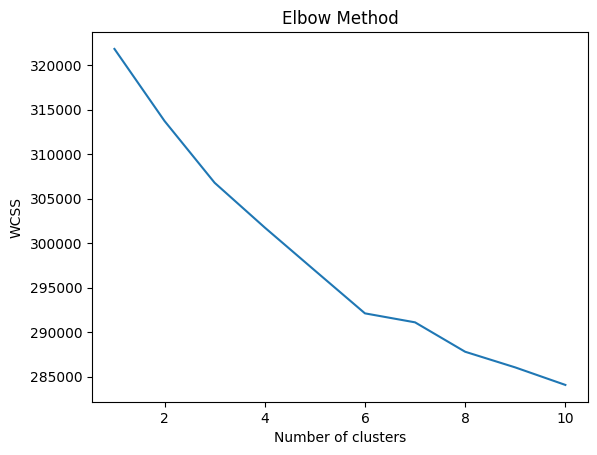

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# Train the K-means model with optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=50, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Evaluate the model using silhouette score
print("Silhouette Score:", silhouette_score(X, y_kmeans))

# Visualize the clusters using t-SNE
tsne = TSNE(n_components=2, perplexity=15, n_iter=100, random_state=0)
X_tsne = tsne.fit_transform(X.toarray())
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans)
plt.title('Clusters')
plt.show

In [1]:
# Determine the hyperparameters
eps = 0.5
min_samples = 5

In [ ]:
from sklearn.cluster import DBSCAN
# Train the DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_dbscan = dbscan.fit_predict(X)
# Evaluate the model using silhouette score
print("Silhouette Score:", silhouette_score(X, y_dbscan))

In [ ]:
from sklearn.manifold import TSNE
# Evaluate the model using silhouette score
print("Silhouette Score:", silhouette_score(X, y_dbscan))

# Visualize the clusters using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=0)
X_tsne = tsne.fit_transform(X.toarray())
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_dbscan)
plt.title('Clusters')
plt.show()

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)


